# 연령별인구현황을 분석하여 10년 뒤 사회현상 예측과 대비

데이터 파일 : 연령별인구현황(201812_202312).csv

* 조회기간 : 2018년~2023년(6년)

01. 데이터프레임과 데이터시각화
02. 년도별총인구수(꺾은선그래프)
03. 년도별행정구역Top3총인구수(꺾은선그래프)
04. (2023년)연령별총인수구(세로막대그래프)
05. (2018년)전국성별연령별인구분포(가로막대그래프)
06. 년도별행정구역 Top3 총인구수(누적막대그래프)
07. 년도별10대총인구수비율(원그래프+도넛그래프)
08. **(서울시)년도별남녀총인구수비교(다중세로막대그래프)**
09. (2023년)연령별행정구역별총인구수(다중세로막대그래프)

# 1) 한글 글꼴 설치하기

* 구글 코랩에 한글 글꼴이 없어서 한글이 깨지는 것을 방지하기 위해 글꼴을 설치해야 한다.
* 매 주피터 노트북 파일마다 설치해야 한다.
* 설치가 끝나면 코랩 [런타임] → [세션 다시 시작]을 선택 후 [예] 클릭
* 모든 라이브러리들을 다시 import 해야 한다.

In [ ]:
# 한글 글꼴 설치하기
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 2) 라이브러리 불러오기

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

---
# **(2018~2023년) 서울특별시 남녀 총인구수 비교**
# (행정구역(서울특별시), (2018~2023년)년도 남자 총인구수, 여자 총인구수)


# 3) 데이터 불러오기

pandas pd.read_csv 도움말 :

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# 구글 드라이브에서 외부 데이터 파일 불러오기

# 1. 구글 드라이브 마운트하기 : [파일-[드라이브 마운트] 아이콘
# 2. 구글 드라이브 파일 경로 복사하기 : content\drive\MyDrive\..\파일명 위에서 우 클릭 [경로 복사]
# 3. 구글 드라이브에서 외부 데이터 파일 불러와 file_name 변수에 할당하기
file_path = '/content/drive/MyDrive/파이썬데이터시각화/SpaceProbe_data/연령별인구현황(201812_202312).csv'

# csv 파일에서 행정구역, 년도별_총인구수 데이터 가져오기
# pd.read_csv('\경로\파일명.csv')
# encoding : csv를 불러올때 한글이 한글이 깨져 열릴때 'cp949'나 'utf-8'로 불러오기
# index_col = index or 'column 명' : row index로 사용할 Col 설정
# nrows = 1 : 1 row까지만 불러오기(header 포함)
# usecols=['월', '품목', '수량'] : 가져올 col 설정 / xlsx 파일에서는 열 머리글로 설정 uscols=('A', 'B:F')
# header = True(default) or False : 첫 줄을 Column 명으로 사용 여부
# sep = ',' : Col 구분자를 설정한다.
# skiprows = 3 또는 [0, 2]) : 첫 번째와 세 번째 row를 제외하고 불러옴(header 포함)
# names = [col_1, col_2, ....] : 칼럼명을 col_1, col_2...로 변경
# na_values =['a'] : NaN을 특정 값(a)로 변경

In [ ]:
# 년도별 남자 인구수 가져오기------------------------------------------------------------------------------------------
# 모든 행정구역 row 가져오기
df_m = pd.read_csv(file_path, encoding ='CP949', usecols=['행정구역','2018년_남_총인구수', '2019년_남_총인구수', '2020년_남_총인구수', '2021년_남_총인구수', '2022년_남_총인구수', '2023년_남_총인구수'])
df_m

In [ ]:
# 년도별 여자 인구수 가져오기------------------------------------------------------------------------------------------
# 모든 행정구역 row 가져오기
df_f = pd.read_csv(file_path, encoding ='CP949', usecols=['행정구역', '2018년_여_총인구수', '2019년_여_총인구수', '2020년_여_총인구수', '2021년_여_총인구수', '2022년_여_총인구수', '2023년_여_총인구수'])
df_f

# 4) 데이터 전처리하기

In [ ]:
# 남자 Col 레이블 바꾸기
df_m.columns = ['행정구역', '2018년', '2019년', '2020년', '2021년', '2022년', '2023년']
df_m

In [ ]:
# 여자 Col 레이블 바꾸기
df_f.columns = df_m.columns
df_f

In [ ]:
# 남자 행정구역 정리하기------------------------------------------------------------------------
# 행정구역을 공백(' ')을 기준으로 분리하고 공백 왼쪽의 행정구역명만 남긴다.

df_m['행정구역'] = df_m['행정구역'].str.split(' ', expand=True).get(0)

# index를 '행정구역'으로 바꾸기------------------------------------------------------------------------
df_m.set_index('행정구역', inplace=True)
df_m

In [ ]:
# 여자 행정구역 정리하기------------------------------------------------------------------------
# 행정구역을 공백(' ')을 기준으로 분리하고 공백 왼쪽의 행정구역명만 남긴다.

df_f['행정구역'] = df_f['행정구역'].str.split(' ', expand=True).get(0)

# index를 '행정구역'으로 바꾸기------------------------------------------------------------------------
df_f.set_index('행정구역', inplace=True)
df_f

In [ ]:
# 남자 인구수 NaN를 ',0'로 바꾸기----------------------------------------------
df_m.fillna(',0', inplace=True)
df_m

In [ ]:
# 여자 인구수 NaN를 ',0'로 바꾸기----------------------------------------------
df_f.fillna(',0', inplace=True)
df_f

In [ ]:
# 전체 행 개수 확인하기
df_m.shape[0]

In [ ]:
# 남자 문자 인구수를 정수 인구수로 바꾸기-------------------------------------------
cnt = df_m.shape[0]     # 총 행 개수를 cnt 변수에 할당한다.
for i in range(cnt):
    df_m.iloc[i] = df_m.iloc[i].str.replace(',', '').astype(int)
df_m

In [ ]:
# 여자 문자 인구수를 정수 인구수로 바꾸기-------------------------------------------
for i in range(cnt):
    df_f.iloc[i] = df_f.iloc[i].str.replace(',', '').astype(int)
df_f

---
# 5) 데이터 시각화하기

In [ ]:
# 한글 폰트 설정하기
plt.rc('font', family = 'NanumGothic', size = 12)

# 음수 축 설정하기
plt.rc('axes', unicode_minus = False)

## 5-1) 여러 개의 계열 세로 막대 그래프 만들기

* plt.bar : 세로 막대 그래프
* 서울특별시의 남, 여 총인구수를 비교해 본다.

In [ ]:
# 남자/여자 인구수 막대 그래프 만들기------------------------------------------------------------------------
plt.figure(figsize=(10,5))                          # 그래프 크기(너비, 높이) 변경하기

area = '서울특별시'                                 # 찾을 행정구역을 area 변수에 저장한다.

# 남자 세로 막대 그래프(x(연도), y(특정지역의 인구수))
plt.bar(df_m.columns, df_m.loc[area]//1000)                    # y축은 df_m.loc['서울특별시']//1000와 동일하다
# 여자 세로 막대 그래프(x(연도), y(특정지역의 인구수))
# plt.bar(df_f.columns, df_f.loc[area]//1000)                    # 남자 막대와 여자 막대가 겹쳐서 보이지 않는다.

plt.title(area + ' 남여 인구수 비교(단위 : 천 명)') # 그래프 제목
plt.xlabel('연도')                                  # x축 제목
plt.ylabel('인구수(천 명)')                         # y축 제목
plt.ylim(3000)                                      # y축 (최솟값)
plt.show()                                          # 그래프만 표시하기

In [ ]:
# 항목(연도) 개수 알아 내기
item = df_m.shape[1]
item

In [ ]:
# x축을 col index로 만들기-----------------------------------------------------------------------
plt.figure(figsize=(10,5))                          # 그래프 크기(너비, 높이) 변경하기
area = '서울특별시'                                 # 찾을 행정구역을 area 변수에 저장한다.

# x축 : 0~5까지의 6개 요소의 배열----------------------------
x = [0, 1, 2, 3, 4, 5]

# 남자 세로 막대 그래프(x(0~5), y(특정지역의 인구수))
plt.bar(x, df_m.loc[area]//1000)                    # x = [0, 1, 2, 3, 4, 5]
# 여자 세로 막대 그래프(x(0~5), y(특정지역의 인구수))
plt.bar(x, df_f.loc[area]//1000)                    # 남자 막대와 여자 막대가 겹쳐서 보이지 않는다.

plt.title(area + ' 남여 인구수 비교(단위 : 천 명)') # 그래프 제목
plt.xlabel('연도')                                  # x축 제목
plt.ylabel('인구수(천 명)')                         # y축 제목
plt.ylim(3000)                                      # y축 (최솟값)
plt.show()                                          # 그래프만 표시하기

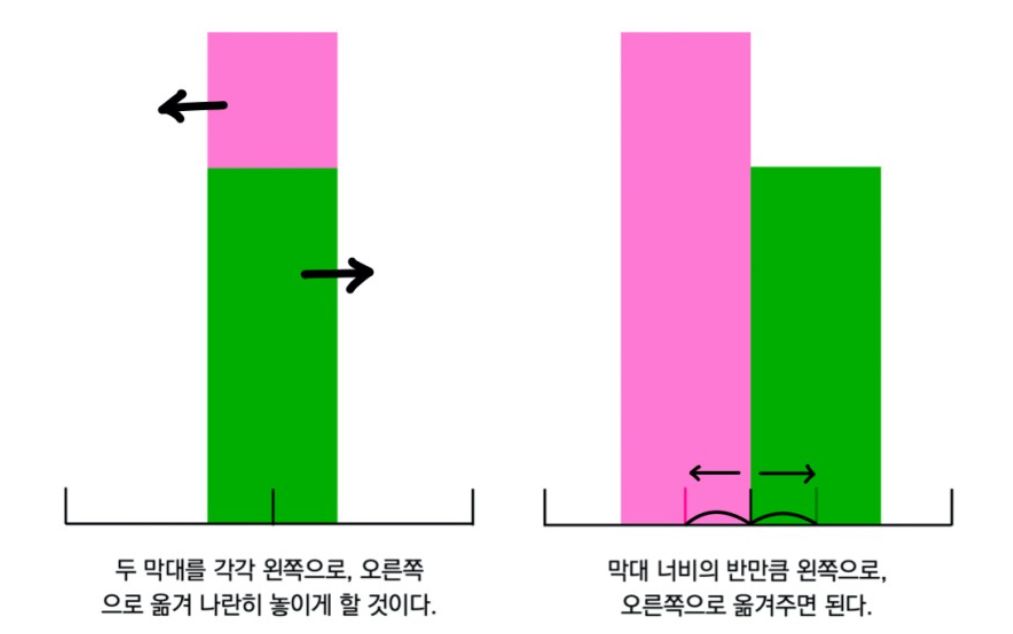

In [ ]:
# 남자 막대를 왼쪽으로 이동하기-----------------------------------------------------------------------
import numpy as np # 벡터 및 행렬 연산에 있어서 매우 편리한 기능 제공
x = np.arange(item)                                 # x = [0, 1, 2, 3, 4, 5]

plt.figure(figsize=(10,5))                          # 그래프 크기(너비, 높이) 변경하기
area = '서울특별시'                                 # 찾을 행정구역을 area 변수에 저장한다.

# x축에서 막대가 이동할 값----------------------------------
n = 0.2

# 남자 세로 막대 그래프(x(0~6)-n, y(특정지역의 인구수))
# x-n : 0~5까지의 6개 요소에 n 변수의 값을 뺀 결과가 x축이 된다.

# width : 막대 그래프의 너비
plt.bar(x-n, df_m.loc[area]//1000, width=n*2, label='남자')
# 여자 세로 막대 그래프(x(0~6)+n, y(특정지역의 인구수))
plt.bar(x+n, df_f.loc[area]//1000, width=n*2, label='여자')

plt.title(area + ' 남여 인구수 비교(단위 : 천 명)') # 그래프 제목
plt.xlabel('연도')                                  # x축 제목
plt.ylabel('인구수(천 명)')                         # y축 제목
plt.ylim(4000)                                      # y축 (최솟값)
plt.legend(loc = 'upper center', ncol = 3)
plt.xticks(x, df_m.columns)                         # x축 항목명 바꾸고 회전하기
plt.show()                                          # 그래프만 표시하기